# Exploratory Data Analysis of Datasets

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
pip install sodapy

In [ ]:
from sodapy import Socrata

## Reading from File

In [ ]:
crashes_columns = pd.read_csv("/content/Motor_Vehicle_Collisions_-_Crashes_20250320.csv")

<ipython-input-127-1438cdc8bee4>:1: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
crashes_columns

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162912,03/16/2025,15:48,BROOKLYN,11221.0,40.685734,-73.934135,"(40.685734, -73.934135)",NaN,NaN,690 PUTNAM AVE,...,Unspecified,NaN,NaN,NaN,4799170,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2162913,03/14/2025,14:50,NaN,NaN,40.681118,-73.964424,"(40.681118, -73.964424)",ATLANTIC AVE,WASHINGTON AVE,NaN,...,Unspecified,NaN,NaN,NaN,4799595,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2162914,03/14/2025,19:00,BROOKLYN,11225.0,40.663517,-73.957210,"(40.663517, -73.95721)",BEDFORD AVE,EMPIRE BLVD,NaN,...,Unspecified,NaN,NaN,NaN,4799610,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
2162915,03/14/2025,14:00,BRONX,10474.0,40.822544,-73.885025,"(40.822544, -73.885025)",EDGEWATER RD,BRUCKNER BLVD,NaN,...,Unspecified,Unspecified,NaN,NaN,4799632,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN


## Reading from API Endpoint

In [ ]:
pip install sodapy

In [ ]:
from sodapy import Socrata

In [ ]:
#crashes_api_endpoint = "https://data.cityofnewyork.us/resource/h9gi-nx95.json"

In [ ]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("h9gi-nx95", limit=1000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [ ]:
results_df.shape

(1000, 29)

In [ ]:
results_df.columns

Index(['crash_date', 'crash_time', 'on_street_name', 'off_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough',
       'zip_code', 'latitude', 'longitude', 'location',
       'contributing_factor_vehicle_3', 'vehicle_type_code_3',
       'cross_street_name', 'contributing_factor_vehicle_4',
       'vehicle_type_code_4', 'contributing_factor_vehicle_5',
       'vehicle_type_code_5'],
      dtype='object')

In [ ]:
results_df.head()

,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,latitude,longitude,location,contributing_factor_vehicle_3,vehicle_type_code_3,cross_street_name,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,WHITESTONE EXPRESSWAY,20 AVENUE,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,QUEENSBORO BRIDGE UPPER,NaN,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-11-01T00:00:00.000,1:29,OCEAN PARKWAY,AVENUE K,1,0,0,0,0,0,...,40.62179,-73.970024,"{'latitude': '40.62179', 'longitude': '-73.970...",Unspecified,Sedan,NaN,NaN,NaN,NaN,NaN
3,2022-06-29T00:00:00.000,6:55,THROGS NECK BRIDGE,NaN,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-09-21T00:00:00.000,13:21,BROOKLYN BRIDGE,NaN,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding how many null/NAN fields in data

In [ ]:
results_df.dtypes

,0
crash_date,object
crash_time,object
on_street_name,object
off_street_name,object
number_of_persons_injured,object
number_of_persons_killed,object
number_of_pedestrians_injured,object
number_of_pedestrians_killed,object
number_of_cyclist_injured,object
number_of_cyclist_killed,object


In [ ]:
results_df.isnull().sum()

,0
crash_date,0
crash_time,0
on_street_name,258
off_street_name,550
number_of_persons_injured,0
number_of_persons_killed,0
number_of_pedestrians_injured,0
number_of_pedestrians_killed,0
number_of_cyclist_injured,0
number_of_cyclist_killed,0


## Geo Mapping Datapoints

In [ ]:
pip install geodatasets

In [ ]:
import geopandas as gdp
import geodatasets
from shapely.geometry import Point
from geopandas import GeoDataFrame
from geodatasets import get_path
import seaborn as sns

In [ ]:
import plotly.express as px

In [ ]:
results_df.latitude = pd.to_numeric(results_df.latitude)
results_df.longitude = pd.to_numeric(results_df.longitude)
results_df.number_of_persons_injured = pd.to_numeric(results_df.number_of_persons_injured)

In [ ]:
testin = results_df.number_of_persons_injured

In [ ]:
sorted(testin, reverse=True)

[7,
 6,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


Map without clustering

In [ ]:
color_scale = [(0,"orange"), (1, "red")]
fig = px.scatter_mapbox(results_df,
                        lat="latitude",
                        lon="longitude",
                        hover_name="on_street_name",
                        hover_data=["crash_date", "crash_time"],
                        size = "number_of_persons_injured",
                        zoom=8,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Map with clustering

In [ ]:
fig.update_traces(cluster=dict(enabled=True))
fig.show()

In [ ]:
danger_classifications = {
    "Safe",
    "Cautious",
    "Dangerous"
}

### Brainstorming
Add additional classification column to dataframe that classifies the danger level based on the amount of persons injured, killed, pedestrians injured killed, drivers injured killed, crashes and anything else relevant.

Classification column will act as ground truth label (y), and other data points will act as input (x) to a model OR a function.

* To classify datapoints This can be a function that does this initially and during productions, or we can use a function initially, then use a decision tree model to classify future datapoints gotten from users.

This will be fed to some other classification model to do the final classification based on the GPS location (lat, long)

# Model Training

## Data Cleaning and Encoding

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification

In [ ]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 10000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("h9gi-nx95", limit=10000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

* One hot encode injured persons for label (y)

In [ ]:
classification_id = []
for i in results_df.number_of_persons_injured:
  if(int(i) == 0):            # Safe
    classification_id.append(0)
  #elif(int(i) ):                        # Caution
  #  classification_id.append(1)
  else:                               # Dangerous
    classification_id.append(1)

In [ ]:
results_df["classification_id"] = classification_id

* Encode borough for input

In [ ]:
ohe_borough = []
for i in results_df.borough:
  if(i == "BROOKLYN"):
    ohe_borough.append(0)
  elif(i == "BRONX"):
    ohe_borough.append(1)
  elif(i == "MANHATTAN"):
    ohe_borough.append(2)
  elif(i == "STATEN_ISLAND"):
    ohe_borough.append(3)
  else:  #QUEENS
    ohe_borough.append(4)

In [ ]:
results_df["ohe_borough"] = ohe_borough

* Encode crash time for input

In [ ]:
from datetime import datetime
time_format = "%H:%M"
ohe_crash_time = []
for i in results_df.crash_time:
  timeObject = datetime.strptime(i,time_format)
  hours = timeObject.hour
  minutes = timeObject.minute
  seconds = timeObject.second
  time_in_seconds = (hours*3600) + (minutes * 60) + seconds
  ohe_crash_time.append(time_in_seconds)


In [ ]:
results_df["ohe_crash_time"] = ohe_crash_time

In [ ]:
test = pd.to_datetime(results_df['crash_date'])
print(test)
print(test.dtype)
print(test.iloc[0].date().month)
print(test.iloc[0].date().day)
print(test.iloc[0].date().year)
print(test.iloc[0].date().weekday()) # Weekday 0 - 6 , Mon - Sun

0      2021-09-11
1      2022-03-26
2      2023-11-01
3      2022-06-29
4      2022-09-21
          ...    
9995   2021-09-18
9996   2021-09-18
9997   2021-09-17
9998   2021-09-18
9999   2021-09-18
Name: crash_date, Length: 10000, dtype: datetime64[ns]
datetime64[ns]
9
11
2021
5


In [ ]:
ohe_dayOfWeek = []
ohe_month = []
for i in results_df.crash_date:
  selectedDateTime = pd.to_datetime(i).date()
  weekDay = selectedDateTime.weekday()
  month = selectedDateTime.month
  ohe_dayOfWeek.append(weekDay)
  ohe_month.append(month)

In [ ]:
results_df["ohe_dayOfWeek"] = ohe_dayOfWeek
results_df["ohe_month"] = ohe_month

* For features, one hot encode Borough, location is just latitude and longitude in a tuple so not useful, zipcode reduces accuracy

* latitude, longitude, and crash time (would be current time from device) are the most useful and are metrics we can actually get from device to feed to model



* Remove all rows will null in it

In [ ]:
features = ["latitude", "longitude", "ohe_crash_time", "ohe_dayOfWeek", "ohe_month"]

In [ ]:
results_df.shape

(10000, 34)

In [ ]:
results_df.dropna(subset=features,inplace=True)

In [ ]:
results_df.shape

(9157, 34)

In [ ]:
results_df.isna().sum()

,0
crash_date,0
crash_time,0
on_street_name,2599
off_street_name,4889
number_of_persons_injured,0
number_of_persons_killed,0
number_of_pedestrians_injured,0
number_of_pedestrians_killed,0
number_of_cyclist_injured,0
number_of_cyclist_killed,0


In [ ]:
X = results_df[features]
y = results_df.classification_id

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

## Decision Tree

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6643013100436681


In [ ]:
importance = clf.feature_importances_

In [ ]:
for i, v in enumerate(importance):
  print("Feature: " + str(features[i]) + ", Score " + str(v))

Feature: latitude, Score 0.32623941089920677
Feature: longitude, Score 0.20916989780473122
Feature: ohe_crash_time, Score 0.3702024035658147
Feature: ohe_dayOfWeek, Score 0.029554333034114953
Feature: ohe_month, Score 0.0648339546961323


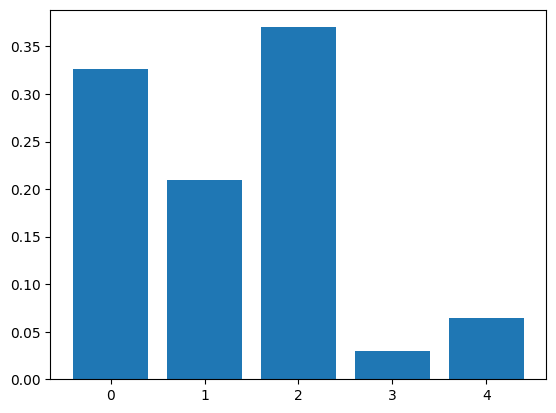

In [ ]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
print(X_test.shape)

(1832, 5)


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
clf = RandomForestClassifier(max_depth=5)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
clf_search = RandomizedSearchCV(clf,
                         param_distributions = param_dist,
                         n_iter = 5,
                         cv = 5)

In [ ]:
clf_search.fit(X_train,y_train)
#clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe73c96ed50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe73897bd10>})

In [ ]:
best_clf = clf_search.best_estimator_
print("Best hyperparameters: ", clf_search.best_params_)

Best hyperparameters:  {'max_depth': 7, 'n_estimators': 112}


In [ ]:
clf = best_clf

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.648471615720524


In [ ]:
importance = clf.feature_importances_

In [ ]:
for i, v in enumerate(importance):
  print("Feature: " + str(features[i]) + ", Score " + str(v))

Feature: latitude, Score 0.33574428654634236
Feature: longitude, Score 0.3170577031503983
Feature: ohe_crash_time, Score 0.3471980103032592


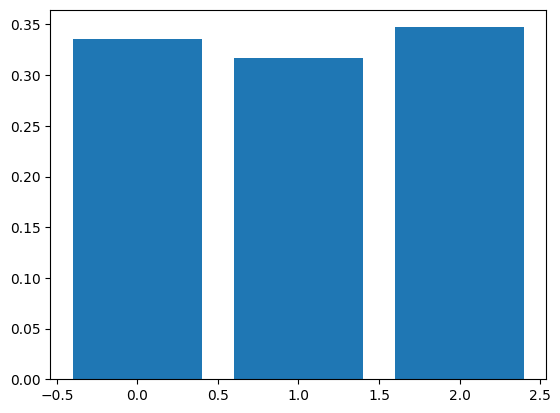

In [ ]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel="linear")

In [ ]:
clf = clf.fit(X_train,y_train)

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

In [ ]:
importance = clf.feature_importances_

In [ ]:
for i, v in enumerate(importance):
  print("Feature: " + str(i) + ", Score " + str(v))

In [ ]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# TabPFN

https://github.com/PriorLabs/TabPFN

## BERT Model

# Save Model

In [ ]:
!pip install skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.17.0 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.2 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1

## Using Pickle

In [ ]:
from pickle import dump
with open("decision_tree.pkl", "wb") as f:
    dump(clf, f, protocol=5)

* Note: Using ONNX, only one input into model is supported, cannot use for decision tree


Try out for training
* Try crash Date (month and day)
* Maybe have additonal column as day of the week (SMTWTHFS)
* Clear out nulls
* Try label holidays